In [65]:
import numpy as np
import pandas as pd

import seaborn as sns
import seaborn.objects as so

# Data processing

**Project :** School Mappers

**Milestone :** 3

Buildin on the [data analysis](Milestone1.ipynb) done in Milestone 1, we are going to process the data, from multiple datasets, in order to get a reduced dataset countaining only the data needed in the visualisation.

We will want to have the following data points :

**For countries :**
| Variable                     | Source                       |
|------------------------------|------------------------------|
| Name                         |                              |
| GDP/Capita                   |                              |
| HDI                          |                              |
| Population                   |                              |
| GINI index                   |                              |
| Income statistics            |                              |
| Enrolment                    |                              |
| Dropout                      |                              |
| Gov. Expenditure on education|                              |
| % of public schools          |                              |
| Litteracy rate               |                              |
| School life expectancy       |                              |
| PISA score                   |                              |

**For schools :**
| Variable                     | Source                       |
|------------------------------|------------------------------|
| Name                         |                              |
| Country                      |                              |
| City                         |                              |
| Latitude                     |                              |
| Longitude                    |                              |
| Access to health infra.      |                              |
| Access to food               |                              |
| Access to sport rooms        |                              |
| Access to science labs       |                             |
| Classroom picture            |                              |
| Cost for parents             |                              |
| Students per class           |                              |
| Subjects availlable          |                              |
| School times                 |                              |
| Average cost of house        |                              |
| Satellite image              |                              |

In addition, where possible, the variables will be divided (e.g. Dropout amoung boys and girls, etc...)

## Data structure

We will use the following data structure :

| Country | Variable | Detail | Value | Source | Year |
|---------|----------|--------|-------|--------|------|
| US      | Name     | /      |United States of America|/|/|
| US      | GDP_per_capita | / | 8950000000 | WorldBank | 2023 |
| US      | Enrolment | Total | 85 | WorldBank | 2023 |
| US      | Enrolment | Female | 87 | WorldBank | 2023 |
| US      | Enrolment | Male | 83 | WorldBank | 2023 |
|...      |...|...|...|...|

Or for schools :
| School | Variable | Value | Source | Year |
|---------|----------|-------|--------|------|
| US_JB      | Name     |J. Biden School|/|/|
| US_JB      | GDP_per_capita | 8950000000 | WorldBank | 2023 |
|...      |...|...|...|...|


## World Bank's EdStats

Our main dataset is the **World Bank's EdStats**: [Education Statistics](https://datacatalog.worldbank.org/search/dataset/0038480/education-statistics). Given the size of the dataset, the [csv files](https://databank.worldbank.org/data/download/EdStats_CSV.zip) are supposed to be in the folder `data` :
```bash
├───data
│       EdStatsCountry-Series.csv
│       EdStatsCountry.csv
│       EdStatsData.csv
│       EdStatsFootNote.csv
│       EdStatsSeries.csv
│       ...
```

In [2]:
PATH = "./data/"

# Loading the EdStats data set from the World Bank
countries = pd.read_csv(PATH+ "EdStatsCountry.csv")
country_series = pd.read_csv(PATH+"EdStatsCountry-Series.csv")
data = pd.read_csv(PATH+"EdStatsData.csv")
foot_note = pd.read_csv(PATH+"EdStatsFootNote.csv")
series = pd.read_csv(PATH+"EdStatsSeries.csv")

In [43]:
# Data
series_code = {
    "GDP/Capita" : {"Total" : "NY.GDP.PCAP.PP.CD"},
    "Population" : {"Total" : "SP.POP.TOTL"},
    "Enrolment" : {
        "Total_secondary" : "SE.SEC.NENR",
        "Female_secondary" : "SE.SEC.NENR.FE",
        "Male_secondary" : "SE.SEC.NENR.MA",
        "Total_primary" : "SE.PRE.NENR",
        "Female_primary" : "SE.PRE.NENR.FE",
        "Male_primary" : "SE.PRE.NENR.MA"
    },
    "Dropout" : {"Total" : "UIS.DR.2.GPV.T"},
    "Gov. Expenditure on education" : {
        "Total": "SE.XPD.TOTL.GD.ZS",
        "Primary" : "SE.XPD.PRIM.PC.ZS",
        "Secondary" : "SE.XPD.PRIM.PC.ZS",
        "Tertiary" : "SE.XPD.PRIM.PC.ZS",
    }, 
    "Litteracy rate" : {
        "Total" : "SE.ADT.LITR.ZS",
        "Male" : "SE.ADT.LITR.MA.ZS",
        "Female" : "SE.ADT.LITR.FE.ZS"
    }, 
    "School life expectancy" : {
        "Total" : "SE.SCH.LIFE",
        "Male" : "SE.SCH.LIFE.MA",
        "Female" : "SE.SCH.LIFE.FE"
    }, 
    "PISA score" : {"Total" : "LO.PISA.MAT"},
    "PISA repartition" : {
        0 : "LO.PISA.MAT.0",
        1 : "LO.PISA.MAT.1",
        2 : "LO.PISA.MAT.2",
        3 : "LO.PISA.MAT.3",
        4 : "LO.PISA.MAT.4",
        5 : "LO.PISA.MAT.5",
        6 : "LO.PISA.MAT.6",
    }
}


countries = ["USA", "MEX", "JPN", "IND", "CHE"]

keys = pd.DataFrame.from_dict(series_code).unstack().dropna().reset_index()
keys.columns =["Variable", "Detail", "Code"]
keys

,Variable,Detail,Code
0,GDP/Capita,Total,NY.GDP.PCAP.PP.CD
1,Population,Total,SP.POP.TOTL
2,Enrolment,Total_secondary,SE.SEC.NENR
3,Enrolment,Female_secondary,SE.SEC.NENR.FE
4,Enrolment,Male_secondary,SE.SEC.NENR.MA
5,Enrolment,Total_primary,SE.PRE.NENR
6,Enrolment,Female_primary,SE.PRE.NENR.FE
7,Enrolment,Male_primary,SE.PRE.NENR.MA
8,Dropout,Total,UIS.DR.2.GPV.T
9,Gov. Expenditure on education,Total,SE.XPD.TOTL.GD.ZS


In [74]:
#Rework the data df to have the year and values in separate columns
new_data = data.drop(["Indicator Name", "Country Name"], axis=1).set_index(["Indicator Code", "Country Code"]).rename_axis("Year", axis=1).stack().rename("Value").reset_index()
new_data["Year"] = pd.to_numeric(new_data["Year"])

In [75]:
# Filtering data and take the last availlable year
df = new_data.loc[new_data["Country Code"].isin(countries) & new_data["Indicator Code"].isin(keys["Code"])].sort_values("Year").groupby(["Indicator Code", "Country Code"]).last().convert_dtypes()
df.head(10)

Year      Value
Indicator Code Country Code                 
LO.PISA.MAT    CHE           2015   521.2506
               JPN           2015   532.4399
               MEX           2015   408.0235
               USA           2015   469.6285
LO.PISA.MAT.0  CHE           2015   4.920916
               JPN           2015   2.939571
               MEX           2015  25.533511
               USA           2015  10.584118
LO.PISA.MAT.1  CHE           2015  10.859171
               JPN           2015   7.752583

c:\Users\arsju\anaconda3\envs\Dataviz\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


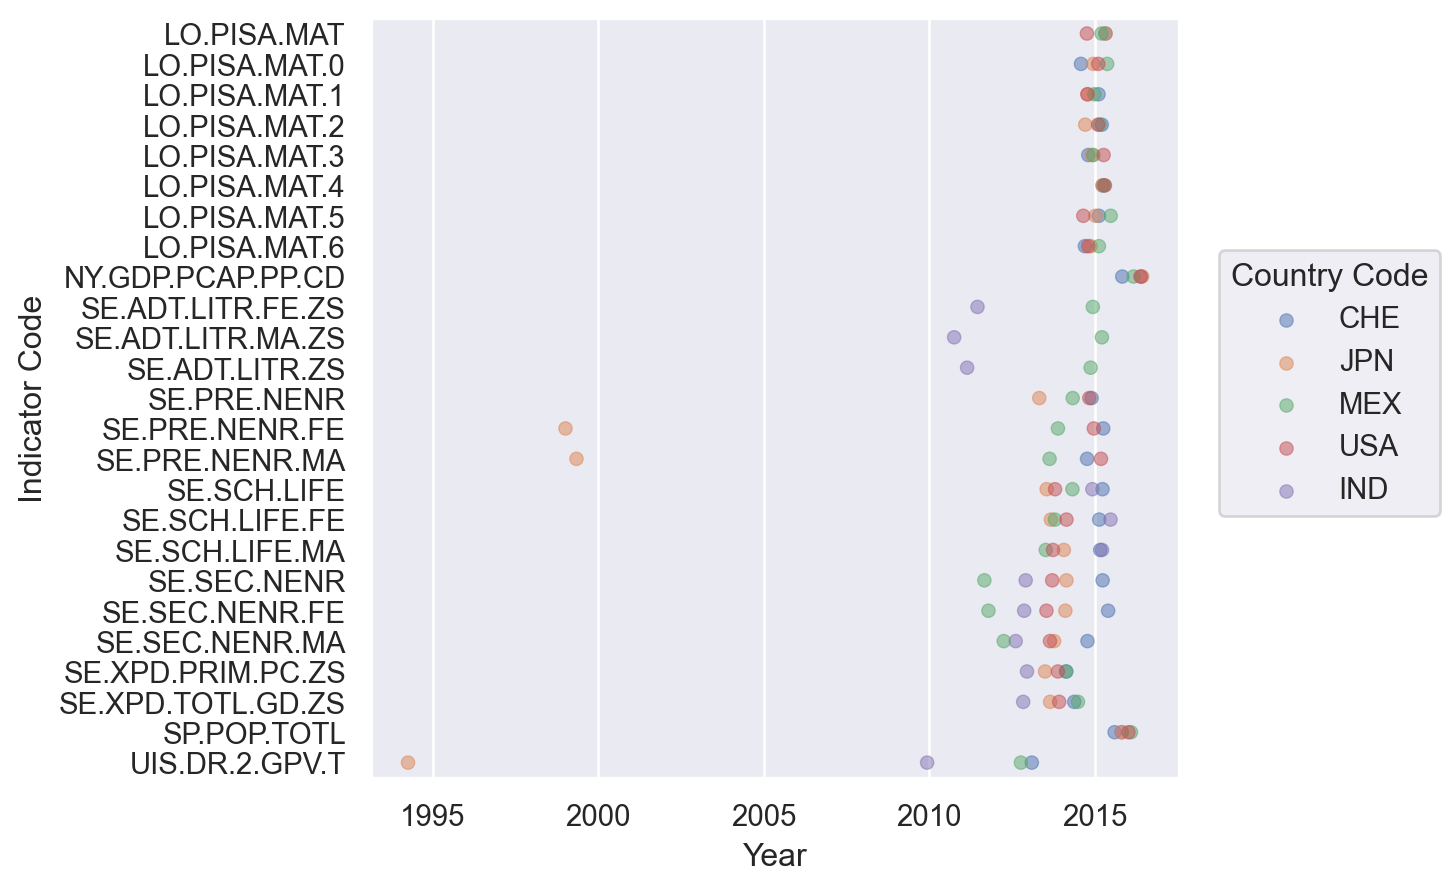

In [91]:
# Plot to check years
(
    so.Plot(df, x="Year", y="Indicator Code", color="Country Code")
    .add(so.Dot(alpha=0.5, pointsize=5), so.Jitter(x=1))
    .plot()
)

We see many missing values, let's quantify it ( and also, take into account only data more recent than 2010)

In [93]:
df.loc[(df.Year >= 2010)].groupby("Indicator Code")["Value"].count()

Indicator Code
LO.PISA.MAT          4
LO.PISA.MAT.0        4
LO.PISA.MAT.1        4
LO.PISA.MAT.2        4
LO.PISA.MAT.3        4
LO.PISA.MAT.4        4
LO.PISA.MAT.5        4
LO.PISA.MAT.6        4
NY.GDP.PCAP.PP.CD    5
SE.ADT.LITR.FE.ZS    2
SE.ADT.LITR.MA.ZS    2
SE.ADT.LITR.ZS       2
SE.PRE.NENR          4
SE.PRE.NENR.FE       3
SE.PRE.NENR.MA       3
SE.SCH.LIFE          5
SE.SCH.LIFE.FE       5
SE.SCH.LIFE.MA       5
SE.SEC.NENR          5
SE.SEC.NENR.FE       5
SE.SEC.NENR.MA       5
SE.XPD.PRIM.PC.ZS    5
SE.XPD.TOTL.GD.ZS    5
SP.POP.TOTL          5
UIS.DR.2.GPV.T       3
Name: Value, dtype: Int64